In [44]:
import os

def get_last_line(filename):
    """Read the last line of a text file."""
    with open(filename, 'r') as file:
        lines = file.readlines()
        if lines:
            return lines[-1].strip()  # Return the last line without newline characters
        return ''

def collect_last_lines(file_list, output_file):
    """Collect the last lines from multiple files and write them to a single file."""
    with open(output_file, 'w') as outfile:
        for file in file_list:
            last_line = get_last_line(file)
            if last_line:  # Only write if the line is not empty
                outfile.write(last_line + '\n')

# List of text files to process
file_list = ['sbl.txt', 'sbl (1).txt', 'sbl (2).txt', 'sbl (3).txt', 'sbl (4).txt',
             'sbl (5).txt', 'sbl (6).txt', 'sbl (7).txt', 'sbl (8).txt', 'sbl (9).txt']  # Add your file names here

# Output file to store the last lines
output_file = 'output.txt'

# Collect and write the last lines to the output file
collect_last_lines(file_list, output_file)

In [45]:
def format_line(line):
    """Format a line by splitting it into table columns using | as separator and ignoring '*** New best ***'."""
    parts = line.split('|')
    # Remove the part containing '*** New best ***'
    parts = [part.strip() for part in parts if '*** New best ***' not in part]
    return ' | '.join(parts)

def create_table(input_file, output_file):
    """Read lines from the input file, format them into table rows, and write to the output file."""
    with open(input_file, 'r') as infile:
        lines = infile.readlines()
    
    with open(output_file, 'w') as outfile:
        for line in lines:
            formatted_line = format_line(line.strip())
            outfile.write(formatted_line + '\n')

# Input and output file names
input_file = 'output.txt'
output_file = 'table_output.txt'

# Create the table formatted output
create_table(input_file, output_file)

In [46]:
def extract_time(line):
    """Extract the time from a line."""
    parts = line.split('|')
    for part in parts:
        if 'Time:' in part:
            return part.strip()
    return ''

def extract_times(input_file, output_file):
    """Read lines from the input file, extract the times, and write them to the output file."""
    with open(input_file, 'r') as infile:
        lines = infile.readlines()
    
    with open(output_file, 'w') as outfile:
        for line in lines:
            time_part = extract_time(line.strip())
            if time_part:
                outfile.write(time_part + '\n')

# Input and output file names
input_file = 'output.txt'
output_file = 'times_output.txt'

# Extract times and write to the output file
extract_times(input_file, output_file)

In [47]:
import re

# Define the input and output file paths
input_file_path = 'table_output.txt'
output_file_path = 'cleaned_table_output.txt'

# Read the content from the input file, clean it, and write the cleaned content to the output file
with open(input_file_path, 'r') as infile, open(output_file_path, 'w') as outfile:
    for line in infile:
        cleaned_line = re.sub(r'Step \d+ \| ', '', line)
        outfile.write(cleaned_line)

print("File cleaned and saved to", output_file_path)

File cleaned and saved to cleaned_table_output.txt


In [48]:
# Define an empty list to store the extracted Patch
patches_list = []

# Open the text file
with open('cleaned_table_output.txt', 'r') as file:
    # Read each line in the file
    for line in file:
        # Split the line into individual patches
        patches = line.strip().split(' | ')
        extracted_patches = []
        for string in patches:
            if string.find("->") != -1:
                result = string.split(" -> ")[0]
                extracted_patches.append(result)
            else:
                extracted_patches.append(string)
        patches_list.append(extracted_patches)

# Print the list of extracted patches
print(patches_list)

[['MOVE 1', 'COPY 11', 'COPY 5'], ['MOVE 3', 'DEL 1', 'COPY 12'], ['MOVE 3', 'MOVE 1'], ['MOVE 3'], ['MOVE 3', 'COPY 8', 'DEL 1', 'COPY 12', 'COPY 5', 'COPY 5', 'DEL 9', 'COPY 3'], ['MOVE 3', 'DEL 7', 'MOVE 5', 'COPY 6', 'COPY 7'], ['MOVE 3', 'COPY 12', 'COPY 12'], ['Step 698'], ['MOVE 3', 'DEL 5'], ['MOVE 3', 'DEL 11', 'COPY 9', 'COPY 0']]


In [49]:
move_count = 0
copy_count = 0
del_count = 0
move_patches = []
copy_patches  = []
del_patches  = []
# Iterate through each sublist
for sublist in patches_list:
    # Count the occurrences of MOVE, COPY, and DEL in the sublist
    for patch in sublist:
        if patch.startswith("MOVE"):
            move_patches.append(patch)
            move_count += 1
        if patch.startswith("COPY"):
            copy_patches.append(patch)
            copy_count += 1
        if patch.startswith("DEL"):
            del_patches.append(patch)
            del_count += 1

# Calculate total count
total_count = move_count + copy_count + del_count

# Print the total counts
print("Total MOVE:", move_count)
print("Total COPY:", copy_count)
print("Total DEL:", del_count)
print("Total:", total_count)

Total MOVE: 11
Total COPY: 14
Total DEL: 6
Total: 31


In [50]:
def count_patches(patches_list):
    # Initialize an empty dictionary to store the counts
    patches_counts = {}
    
    # Iterate through the list
    for patch in patches_list:
        # If the Patch is not already in the dictionary, add it with count 1
        if patch not in patches_counts:
            patches_counts[patch] = 1
        # If the Patch is already in the dictionary, increment its count
        else:
            patches_counts[patch] += 1
    return patches_counts
    
move_counts = count_patches(move_patches)
del_counts = count_patches(del_patches)
copy_counts = count_patches(copy_patches)

print(move_counts)
print(del_counts)
print(copy_counts)

{'MOVE 1': 2, 'MOVE 3': 8, 'MOVE 5': 1}
{'DEL 1': 2, 'DEL 9': 1, 'DEL 7': 1, 'DEL 5': 1, 'DEL 11': 1}
{'COPY 11': 1, 'COPY 5': 3, 'COPY 12': 4, 'COPY 8': 1, 'COPY 3': 1, 'COPY 6': 1, 'COPY 7': 1, 'COPY 9': 1, 'COPY 0': 1}


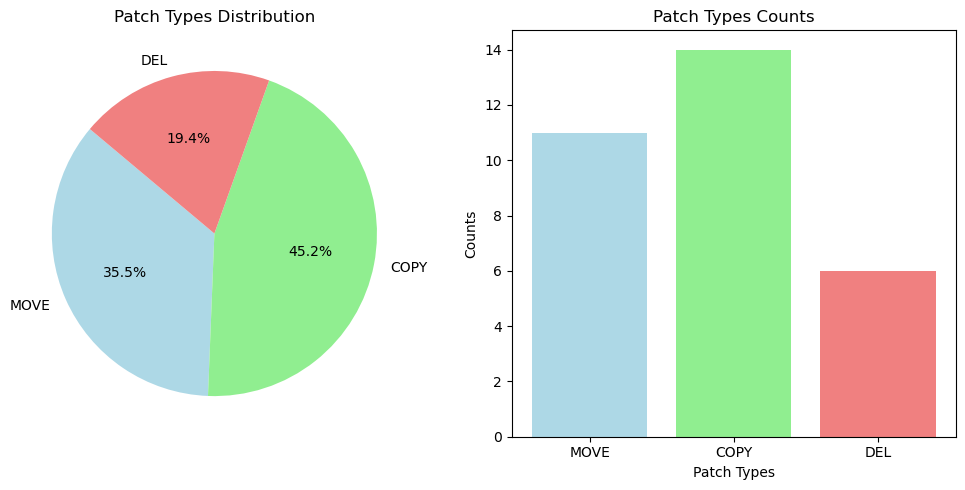

In [51]:
import matplotlib.pyplot as plt

# Define the labels and counts for the pie chart
labels = ['MOVE', 'COPY', 'DEL']
sizes = [move_count, copy_count, del_count]
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plot the pie chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Patch Types Distribution')

# Plot the bar chart
plt.subplot(1, 2, 2)
plt.bar(labels, [move_count, copy_count, del_count], color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Patch Types Counts')
plt.xlabel('Patch Types')
plt.ylabel('Counts')

# Show the plots
plt.tight_layout()
plt.show()

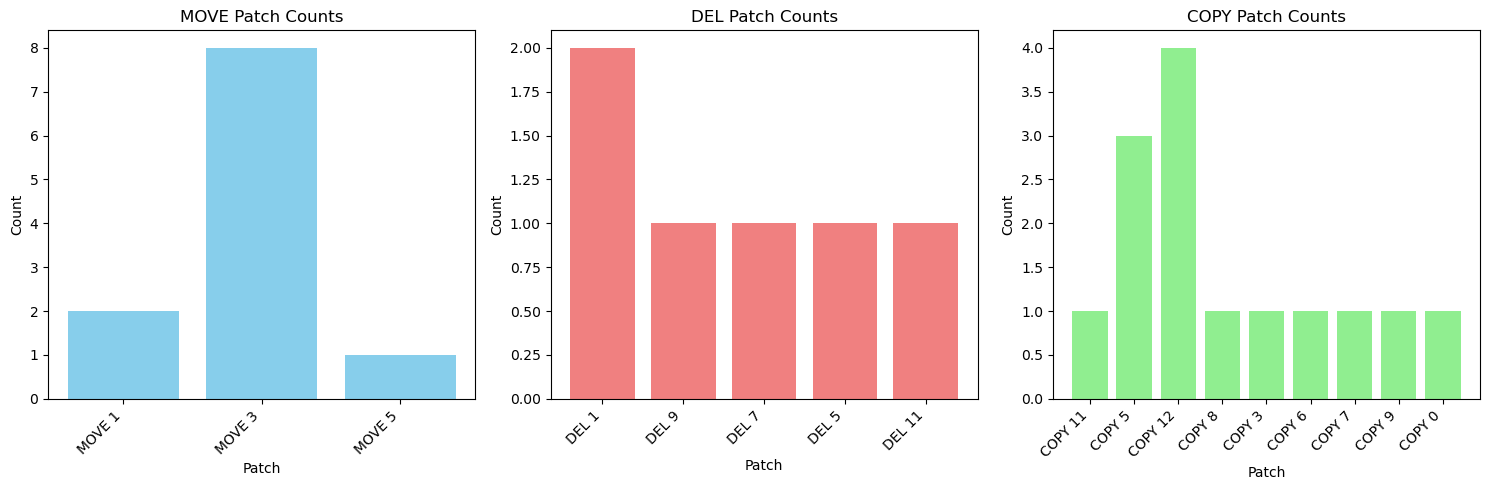

In [52]:
import matplotlib.pyplot as plt

# Define the dictionaries containing counts for each type of Patch
move_counts = {'MOVE 1': 2, 'MOVE 3': 8, 'MOVE 5': 1}
del_counts = {'DEL 1': 2, 'DEL 9': 1, 'DEL 7': 1, 'DEL 5': 1, 'DEL 11': 1}
copy_counts = {'COPY 11': 1, 'COPY 5': 3, 'COPY 12': 4, 'COPY 8': 1, 'COPY 3': 1, 'COPY 6': 1, 'COPY 7': 1, 'COPY 9': 1, 'COPY 0': 1}

# Extract keys and values for each dictionary
move_labels, move_values = zip(*move_counts.items())
del_labels, del_values = zip(*del_counts.items())
copy_labels, copy_values = zip(*copy_counts.items())

# Plot bar charts for MOVE, COPY, and DEL Patch
plt.figure(figsize=(15, 5))

# Plot MOVE Patch
plt.subplot(1, 3, 1)
plt.bar(move_labels, move_values, color='skyblue')
plt.title('MOVE Patch Counts')
plt.xlabel('Patch')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Plot DEL Patch
plt.subplot(1, 3, 2)
plt.bar(del_labels, del_values, color='lightcoral')
plt.title('DEL Patch Counts')
plt.xlabel('Patch')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Plot COPY Patch
plt.subplot(1, 3, 3)
plt.bar(copy_labels, copy_values, color='lightgreen')
plt.title('COPY Patch Counts')
plt.xlabel('Patch')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()